In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option('display.max_rows', None)

In [58]:
# Nombre del archivo CSV
file_name = 'amz_uk_price_prediction_dataset.csv'

# Leer el archivo CSV
df = pd.read_csv(file_name)

# Mostrar las primeras filas del DataFrame
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [59]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [60]:
category_counts = df['category'].value_counts()
pd.DataFrame(category_counts)


,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978
...,...
Alexa Built-In Devices,107
Motorbike Chassis,107
Plugs,107


In [61]:
top_five_categories= category_counts.head(5)
top_five_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [62]:
frequency_category_table = df['category'].value_counts()
frequency_category_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

/var/folders/b7/hph07_m53vv3yzmmfgf8b7fm0000gn/T/ipykernel_2600/3023630291.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_category_table.index, y=frequency_category_table.values, palette="Set3")


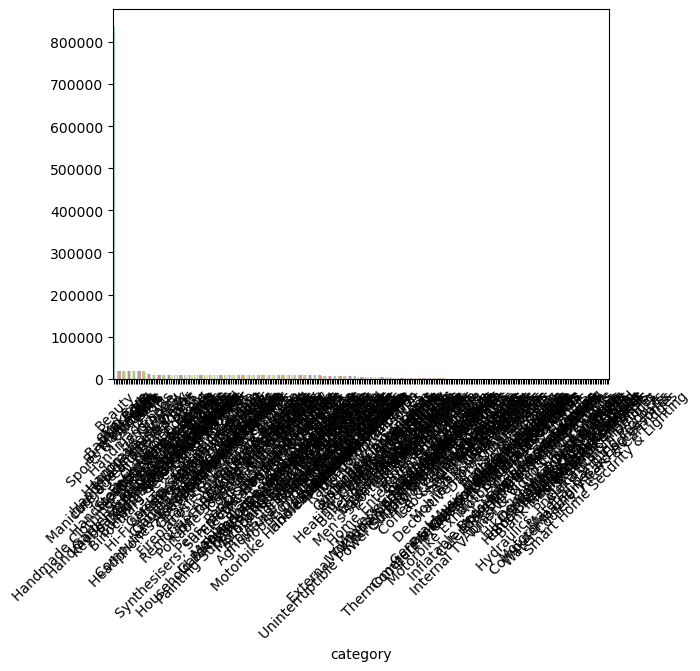

In [63]:
sns.barplot(x=frequency_category_table.index, y=frequency_category_table.values, palette="Set3")
plt.xticks(rotation=45)
plt.show()

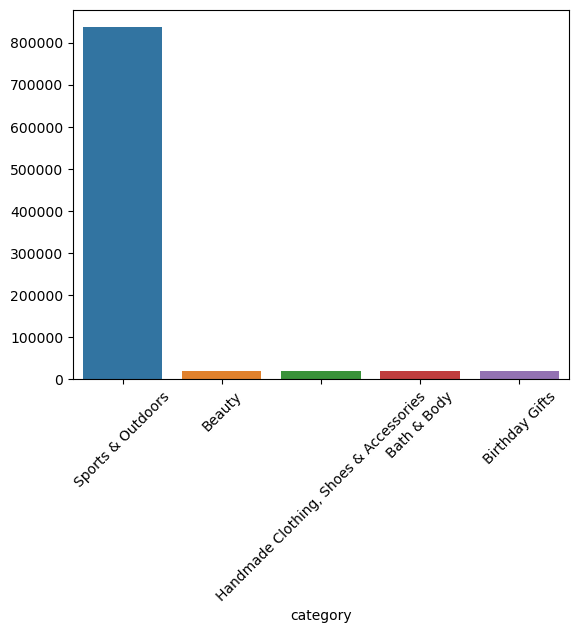

In [64]:

sns.barplot(x=top_five_categories.index, y=top_five_categories.values,hue=top_five_categories.index, legend=False)
plt.xticks(rotation=45)
plt.show()

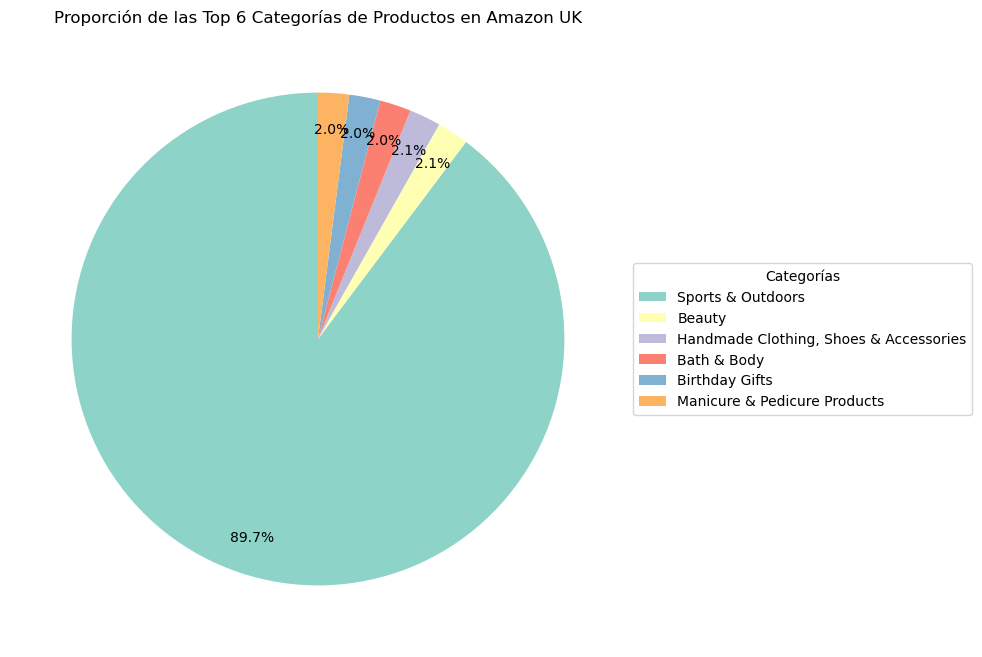

In [65]:
top_six_categories = frequency_category_table.head(6)
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(top_six_categories, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"),pctdistance=0.85)
plt.legend(wedges, top_six_categories.index, title="Categorías", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Proporción de las Top 6 Categorías de Productos en Amazon UK')
plt.show()

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [66]:
df_price = df[df['price'].notnull()]
# Calcular la media, mediana y moda
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]  # [0] para obtener el valor de la moda

# Imprimir los resultados
print(f"Precio medio (mean): {mean_price}")
print(f"Precio mediano (median): {median_price}")
print(f"Precio más común (mode): {mode_price}")

Precio medio (mean): 89.24380943923663
Precio mediano (median): 19.09
Precio más común (mode): 9.99


In [67]:
#Ahora por productos
df_grouped = df.groupby('category')['price'].mean().reset_index()

In [68]:
df_grouped = df.groupby('category')['price'].agg(
    mean='mean', 
    median='median',
    mode=lambda x: x.mode().iloc[0]  # La moda puede tener múltiples valores si hay varios valores que son los que más repiten, poniendo eso devuelve el primero, pero sino devuelve mas
).reset_index()

In [77]:
df_grouped_modas = df.groupby('category')['price'].agg(
    mean='mean', 
    median='median',
    mode=lambda x: list(x.mode())  # Devuelve una lista con todas las modas
).reset_index()

In [78]:
df_grouped_modas

,category,mean,median,mode
0,3D Printers,1018.036129,319.00,[499.0]
1,3D Printing & Scanning,99.909599,36.86,[313.99]
2,Abrasive & Finishing Products,15.801760,10.49,[5.99]
3,Action Cameras,135.418598,60.77,[16.99]
4,Adapters,8.750197,7.05,[7.99]
...,...,...,...,...
291,Wind Instruments,391.590480,126.79,[9.99]
292,Window Treatments,20.668326,17.99,[18.99]
293,Women,22.262394,16.49,[9.99]
294,Women's Sports & Outdoor Shoes,73.332266,61.64,[29.99]


In [79]:
#vamos a mostrar solo aquellas filas cuya moda sea más de un elemento
df_grouped_modas_multiples=df_grouped_modas[df_grouped_modas['mode'].apply(lambda x: len(x)>1)] 
df_grouped_modas_multiples

,category,mean,median,mode
6,Alexa Built-In Devices,223.004579,149.990,"[29.99, 99.0, 149.0]"
11,Bakeware,14.896569,12.000,"[9.99, 10.99]"
15,Bass Guitars & Gear,106.542557,45.420,"[17.99, 61.12, 159.99]"
39,CPUs,514.519317,159.960,"[7.99, 69.99]"
53,Computer & Server Racks,165.714590,84.295,"[24.99, 129.0]"
55,Computer Cases,90.549237,69.990,"[49.99, 79.99, 89.99]"
56,Computer Memory,55.615202,38.010,"[13.99, 17.83]"
57,Computer Memory Card Accessories,23.571368,12.990,"[9.99, 12.99]"
60,"Computers, Components & Accessories",92.365623,22.570,"[4.99, 9.99, 11.99, 89.99]"
62,Cookware,180.482000,43.000,"[24.99, 29.99]"


In [81]:
df_grouped[df_grouped['category']=='Sports & Outdoors']

,category,mean,median,mode
262,Sports & Outdoors,125.769814,23.3,12.99


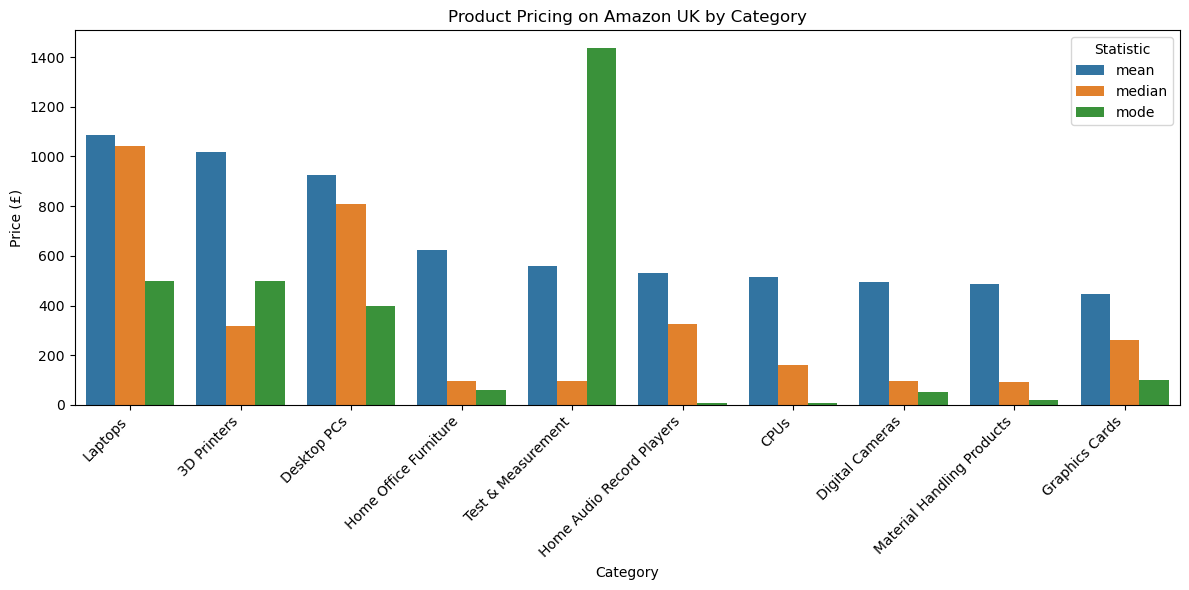

In [70]:
ten_expensive_categories = df_grouped.nlargest(10, 'mean')

# Melting the DataFrame for visualization
df_expensive_melted = ten_expensive_categories.melt(
    id_vars='category', 
    value_vars=['mean', 'median', 'mode'],
    var_name='Statistic', 
    value_name='Price'
)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='Price', hue='Statistic', data=df_expensive_melted)
plt.xticks(rotation=45, ha='right')
plt.title('Product Pricing on Amazon UK by Category')
plt.ylabel('Price (£)')
plt.xlabel('Category')
plt.legend(title='Statistic')
plt.tight_layout()
plt.show()

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [71]:
filtered_five_common_df = df[df['category'].isin(top_five_categories)]

In [72]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [73]:
category_counts

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [74]:
top_five = category_counts.head(5).index.tolist()

filtered_df = df[df['category'].isin(top_five)]
filtered_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82165,89485,B08G2HBBB6,GoPro HERO9 - Waterproof Sports Camera with Fr...,4.5,5161,199.00,True,0,Sports & Outdoors
82166,89486,B09D15SFMQ,GoPro HERO10 Black - Waterproof Action Camera ...,4.4,2467,249.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


In [75]:
dispersion_results = {}
for category in top_five:
    prices = filtered_df[filtered_df['category'] == category]['price']
    
    variance = prices.var()                       # Varianza
    std_dev = prices.std()                        # Desviación estándar
    price_range = prices.max() - prices.min()    # Rango
    Q1 = prices.quantile(0.25)                   # Primer cuartil
    Q3 = prices.quantile(0.75)                   # Tercer cuartil
    IQR = Q3 - Q1                                  # Rango intercuartil

    # Almacenar los resultados en un diccionario
    dispersion_results[category] = {
        'Varianza': variance,
        'Desviación Estándar': std_dev,
        'Rango': price_range,
        'IQR': IQR
    }

# Mostrar los resultados y transponer
dispersion_df = pd.DataFrame(dispersion_results).T
print("Medidas de dispersión para las cinco categorías más comunes:")
dispersion_df

Medidas de dispersión para las cinco categorías más comunes:


,Varianza,Desviación Estándar,Rango,IQR
Sports & Outdoors,205264.853588,453.061644,100000.00,44.94
Beauty,313.096907,17.694545,1198.74,9.55
"Handmade Clothing, Shoes & Accessories",1081.683831,32.888962,899.01,13.39
Bath & Body,206.198085,14.359599,590.26,11.79
Birthday Gifts,3690.438667,60.748981,1895.05,14.01


La varianza en Sports & Outdoors y muy grande, por eso sé que hay una diferencia grande entre los precios de los productos de esta categoría. y sabiendo que el IQR es 45 y el rango tanto, sabemos que la media es 23.3 asi que... pocas cosas muy caras  Solo lo sé en comparación con la varianza de las demás categorías, porque por sí solo la verdad es que no me dice nada. en belleza y bath and body hay mucha menos, lo que me hace pensar que los precios de los productos se parecen un poco más entre ellos. 

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

<Axes: xlabel='price', ylabel='Count'>

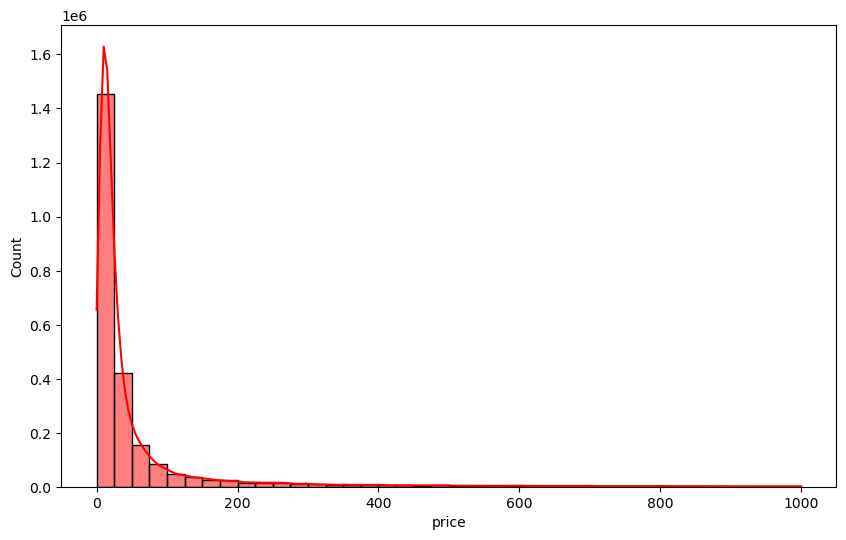

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['price']<1000]['price'],bins=40,kde=True,color='red')

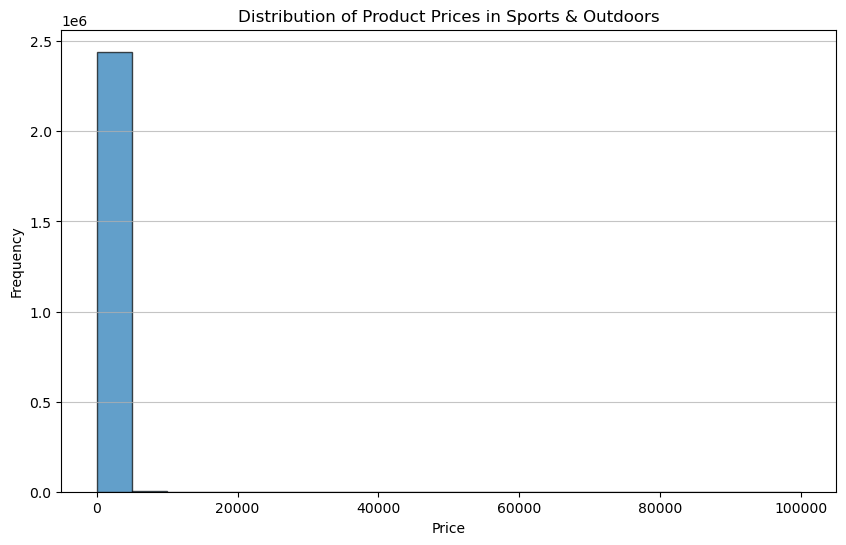

In [82]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Product Prices in Sports & Outdoors')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [87]:
Q1_price = df['price'].quantile(0.25)
Q3_price= df['price'].quantile(0.75)

IQR_price = Q3_price - Q1_price

df_clean_price = df[(df['price'] >= Q1_price - 1.5*IQR_price) & (df['price'] <= Q3_price + 1.5*IQR_price)]

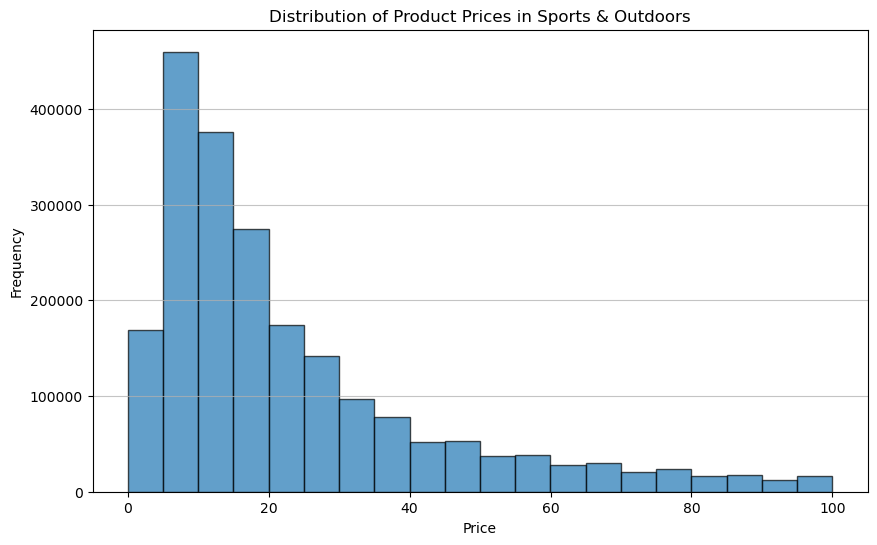

In [88]:
plt.figure(figsize=(10, 6))
plt.hist(df_clean_price['price'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Product Prices in Sports & Outdoors')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [92]:
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode().iloc[0] 

print(f"Mean Rating: {mean_rating}")
print(f"Median Rating: {median_rating}")
print(f"Mode Rating: {mode_rating}")

Mean Rating: 2.152836472966065
Median Rating: 0.0
Mode Rating: 0.0


In [93]:
df.groupby('category')['stars'].mean().sort_values(ascending=False)

category
Luxury Food & Drink                       4.547570
Grocery                                   4.469061
Laptop Accessories                        4.449600
Health & Personal Care                    4.439649
Arts & Crafts                             4.432663
                                            ...   
Motorbike Instruments                     0.166507
3D Printing & Scanning                    0.148267
Motorbike Handlebars, Controls & Grips    0.125466
Motorbike Electrical & Batteries          0.097857
CD, Disc & Tape Players                   0.083655
Name: stars, Length: 296, dtype: float64

In [98]:

pd.set_option('display.max_rows', None)
df.groupby('category')['stars'].agg(
    mean='mean', 
    median='median',
    mode=lambda x: list(x.mode())  # Devuelve una lista con todas las modas
).sort_values(by='mean', ascending=False)

,mean,median,mode
category,,,
Luxury Food & Drink,4.547570,4.60,[4.7]
Grocery,4.469061,4.50,[4.6]
Laptop Accessories,4.449600,4.60,[4.6]
Health & Personal Care,4.439649,4.50,[4.5]
Arts & Crafts,4.432663,4.50,[4.6]
Office Paper Products,4.429804,4.60,[4.7]
Customers' Most Loved,4.409956,4.40,[4.5]
"Water Coolers, Filters & Cartridges",4.363636,4.50,[4.5]
USB Hubs,4.356800,4.40,[4.5]


In [100]:
variance_rating = df['stars'].var()

std_dev_rating = df['stars'].std()

Q1 = df['stars'].quantile(0.25)
Q3 = df['stars'].quantile(0.75)

IQR = Q3 - Q1

print(f"Variance of Ratings: {variance_rating}")
print(f"Standard Deviation of Ratings: {std_dev_rating}")
print(f"Q1 (25th Percentile): {Q1}")
print(f"Q3 (75th Percentile): {Q3}")
print(f"IQR: {IQR}")

Variance of Ratings: 4.81743402976196
Standard Deviation of Ratings: 2.1948653785054697
Q1 (25th Percentile): 0.0
Q3 (75th Percentile): 4.4
IQR: 4.4
